# Binary Classification - Logistic Regression

Building and Evaluating a binary classifier using a heart disease dataset.

## Imports

In [1]:
# Ignore warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [4]:
# Read CSV
df = pd.read_csv('../data/heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Shape of the data, Rows, Columns
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df['target'].unique()

array([1, 0], dtype=int64)

In [10]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [11]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Visualization

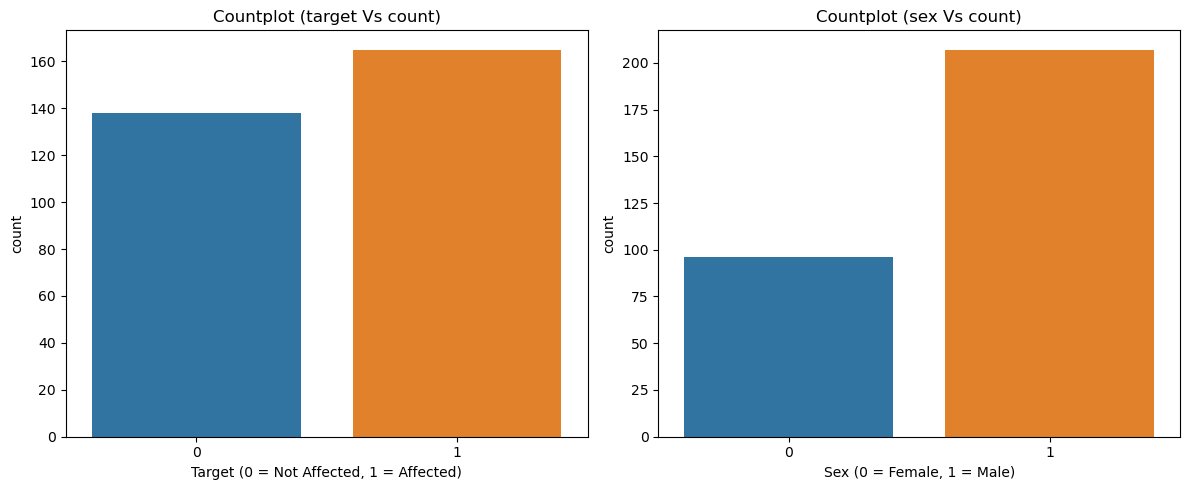

In [21]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first chart on the first subplot
sns.countplot(data=df, x='target', ax=axes[0])
axes[0].set_title('Countplot (target Vs count)')
axes[0].set_xlabel('Target (0 = Not Affected, 1 = Affected)')

# Plot the second chart on the second subplot
sns.countplot(data=df, x='sex', ax=axes[1])
axes[1].set_title('Countplot (sex Vs count)')
axes[1].set_xlabel('Sex (0 = Female, 1 = Male)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save figs
fig.savefig('../assets/visualization/subplot-1.png', dpi=300)

# Show the plot
plt.show()

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

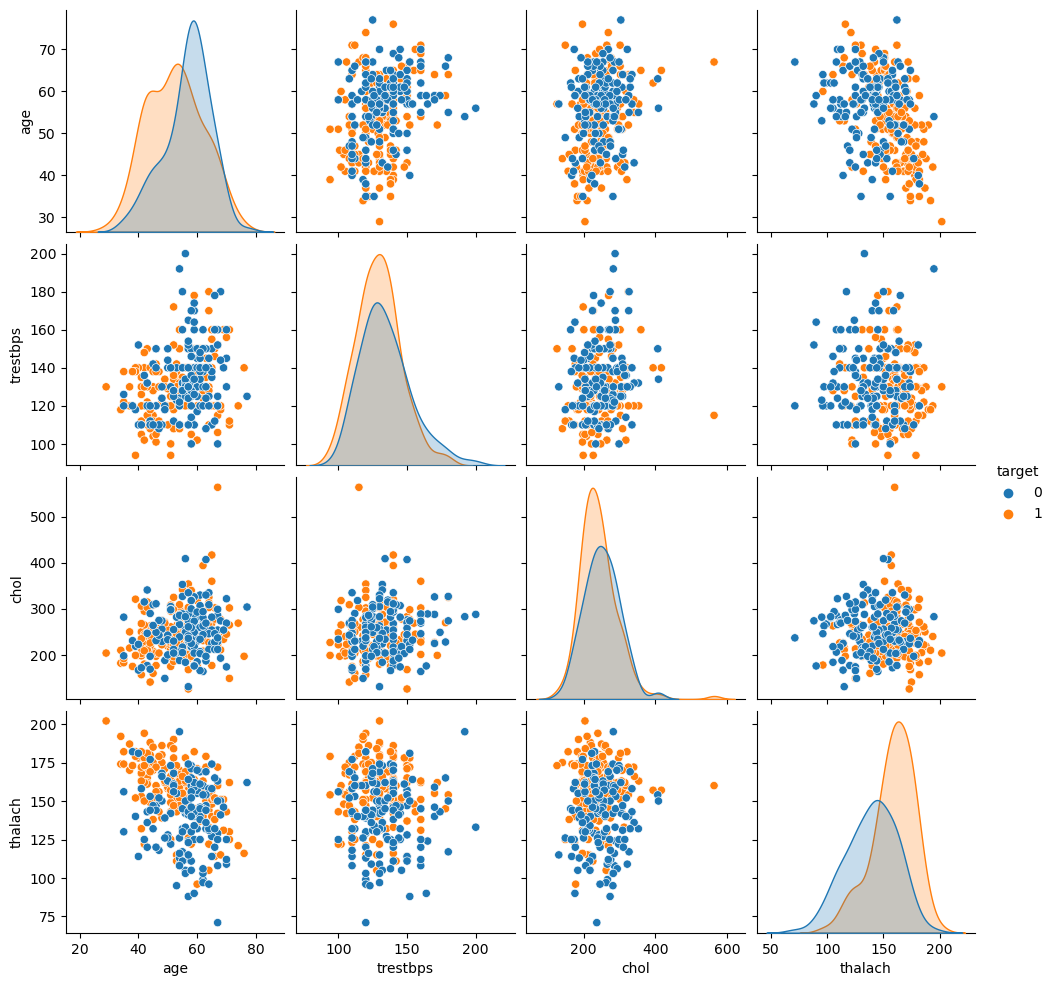

In [20]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', diag_kind='kde')

# Save figs
plt.savefig('../assets/visualization/pairplot.png', dpi=300)

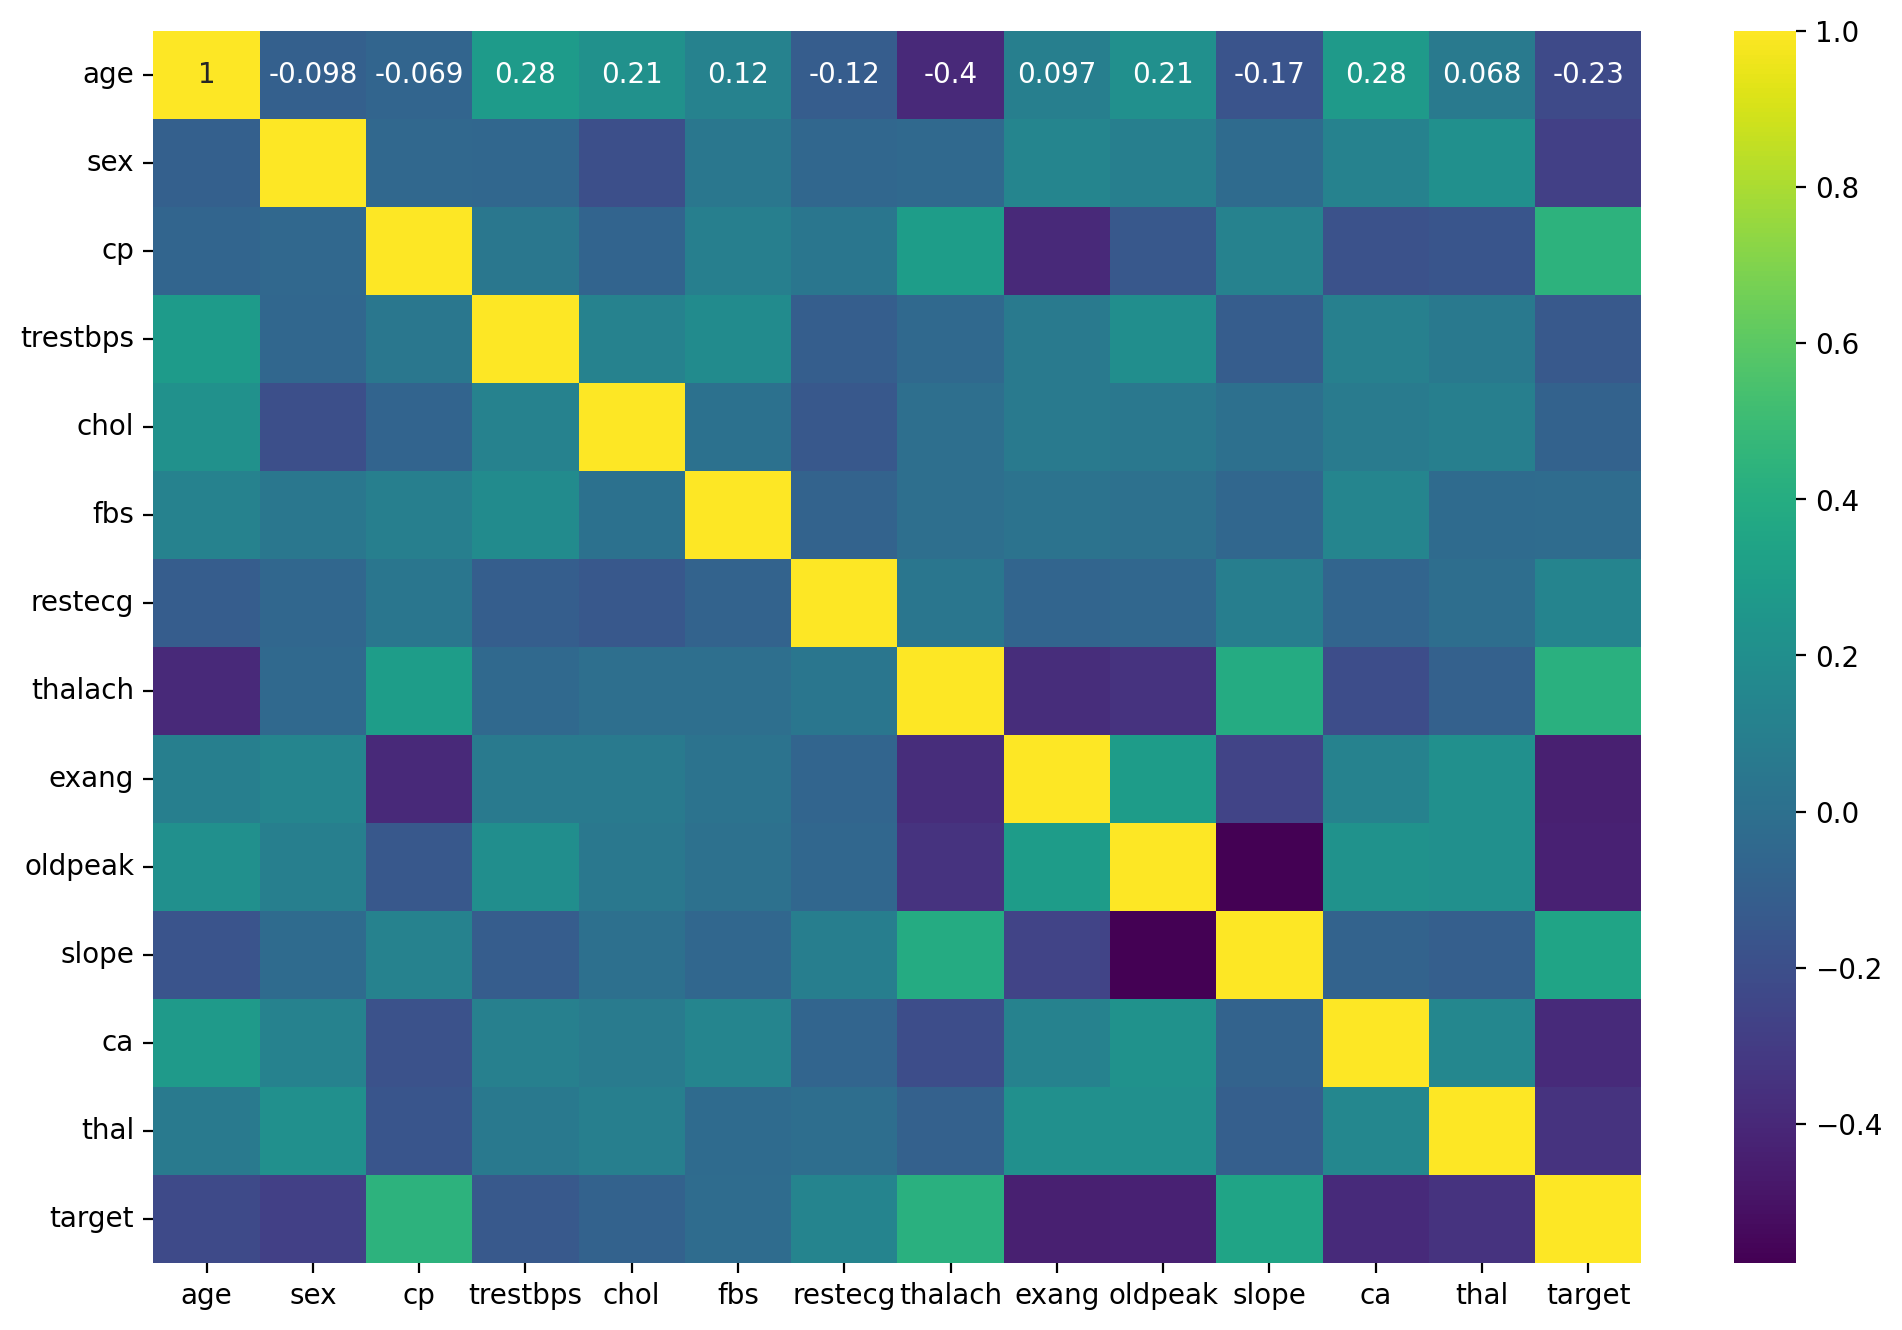

In [25]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Save figs
plt.savefig('../assets/visualization/heatmap-1.png', dpi=300)

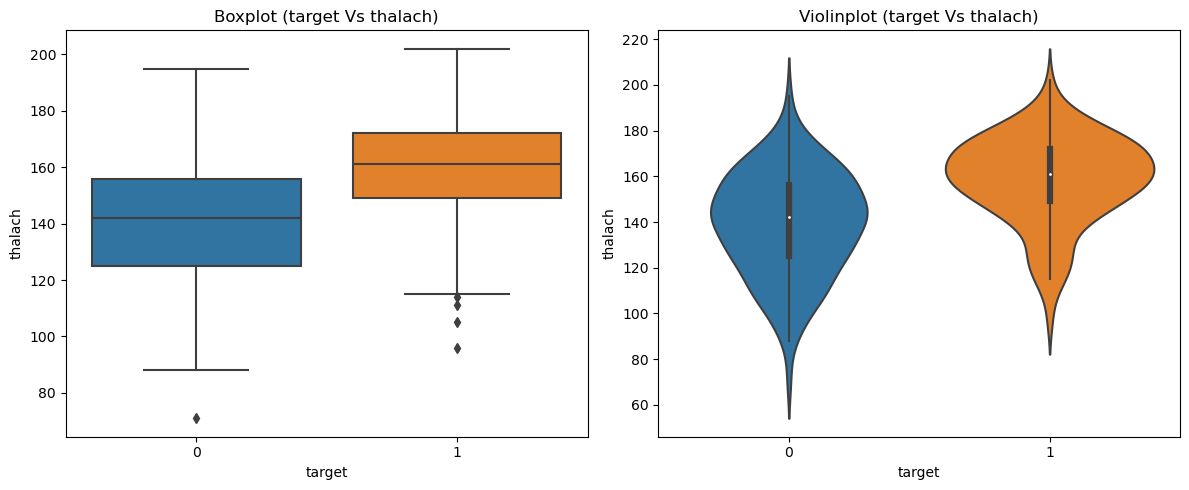

In [23]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first chart on the first subplot
sns.boxplot(x='target', y='thalach', data=df, ax=axes[0])
axes[0].set_title('Boxplot (target Vs thalach)')

# Plot the second chart on the second subplot
sns.violinplot(x='target', y='thalach', data=df, ax=axes[1])
axes[1].set_title('Violinplot (target Vs thalach)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save figs
fig.savefig('../assets/visualization/subplot-2.png', dpi=300)

# Show the plot
plt.show()

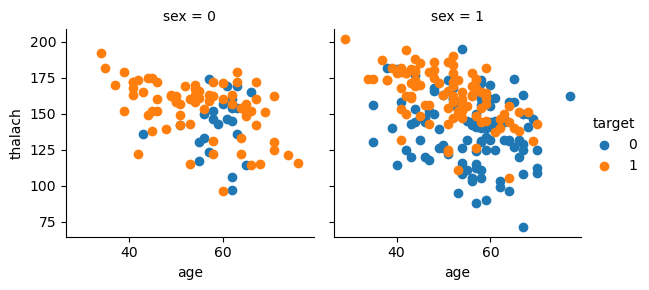

In [26]:
g = sns.FacetGrid(df, col='sex', hue='target')
g.map(plt.scatter, 'age', 'thalach')
g.add_legend()

# Save figs
plt.savefig('../assets/visualization/facegrid.png', dpi=300)

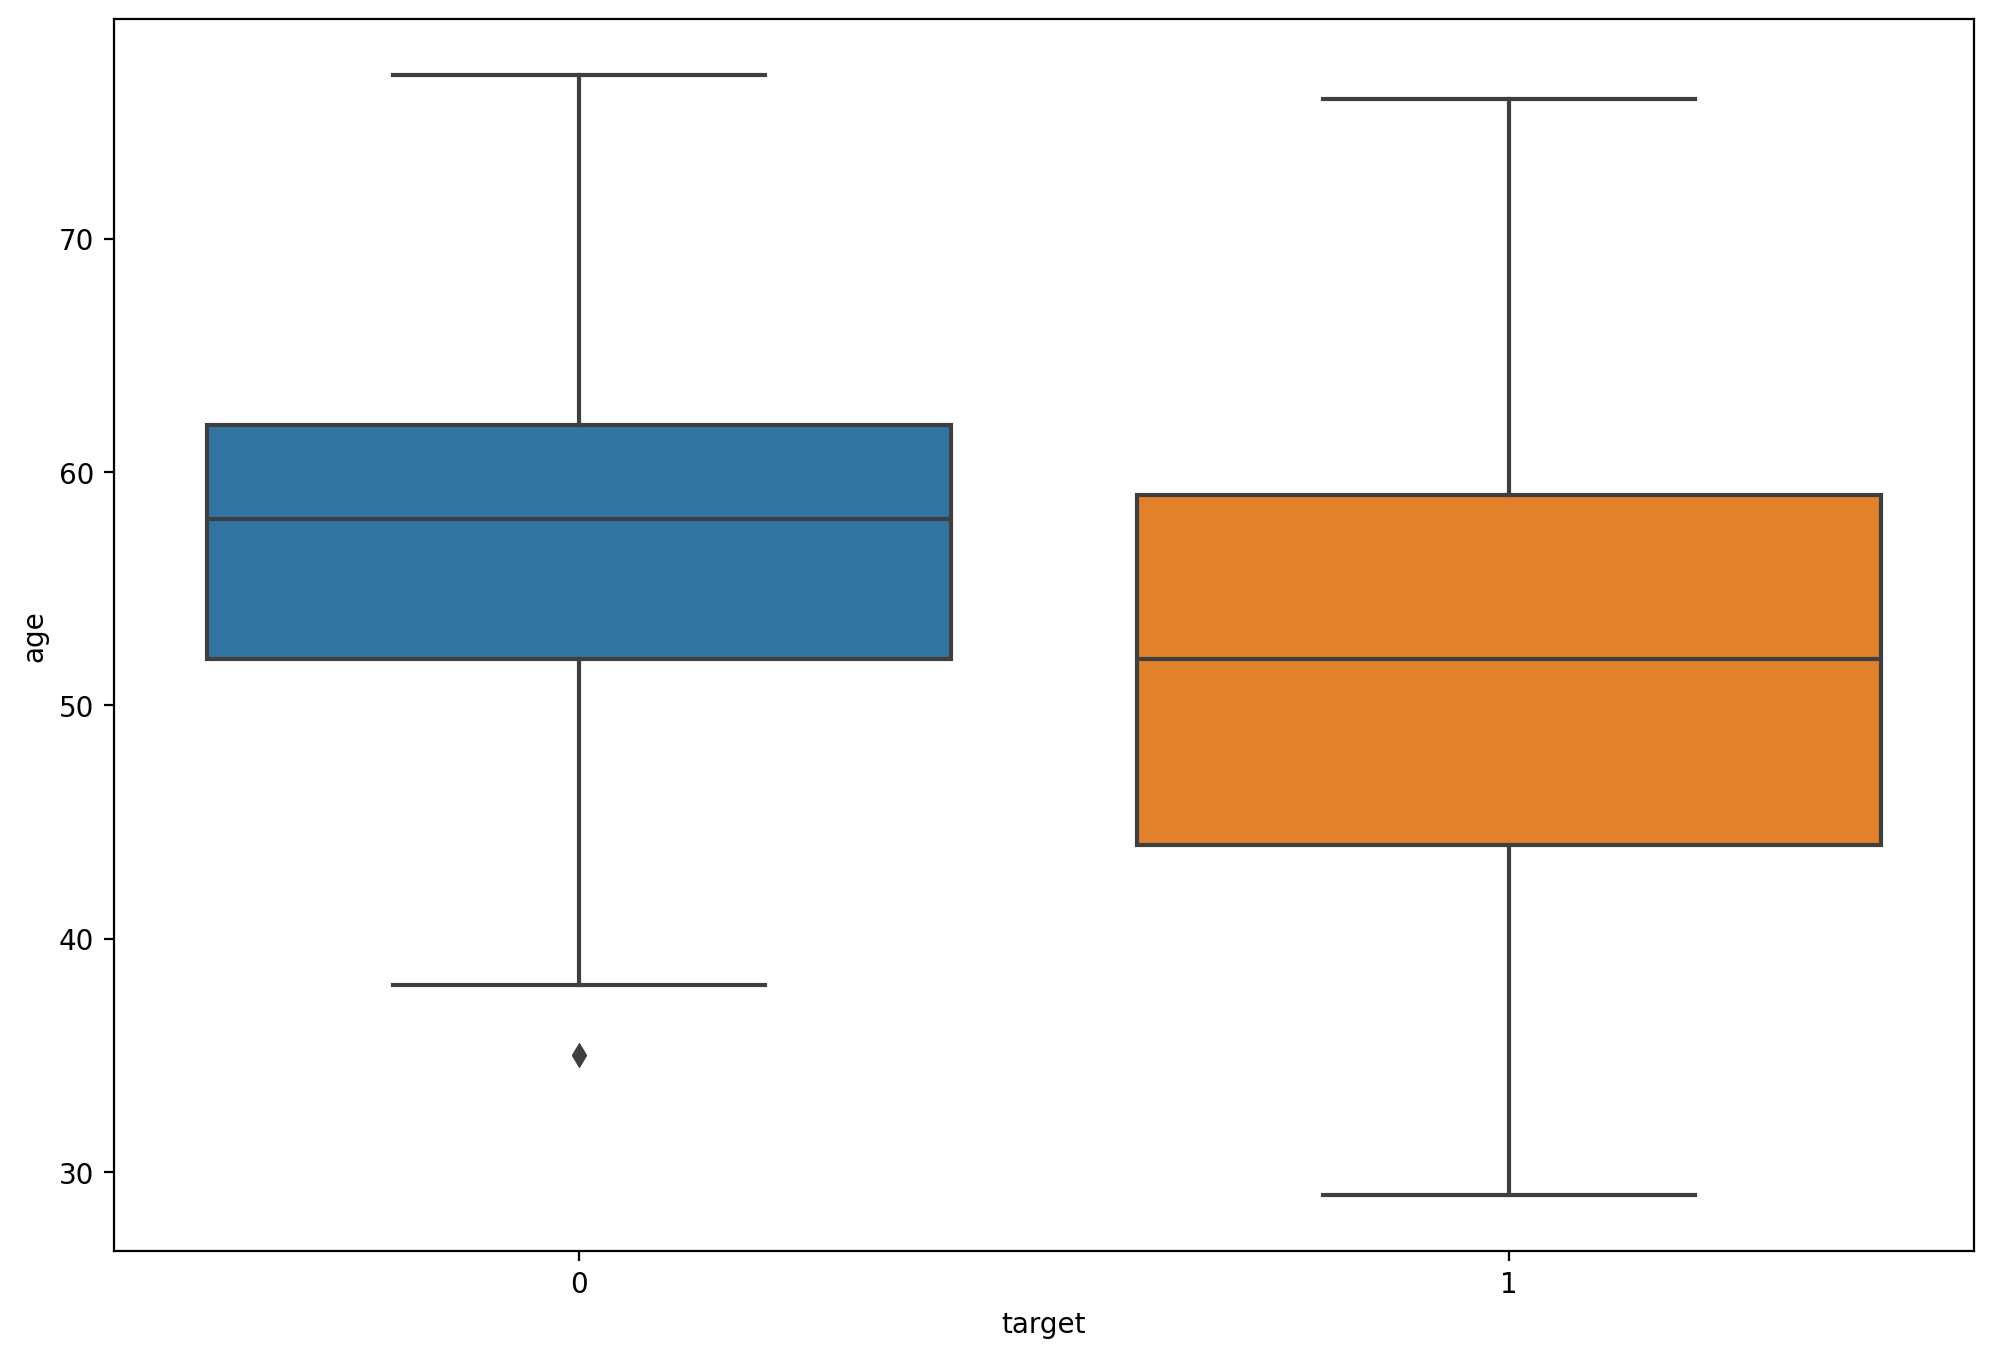

In [27]:
plt.figure(figsize=(12,8), dpi=200)
sns.boxplot(x='target', y='age', data=df)

# Save figs
plt.savefig('../assets/visualization/boxplot-1.png', dpi=300)

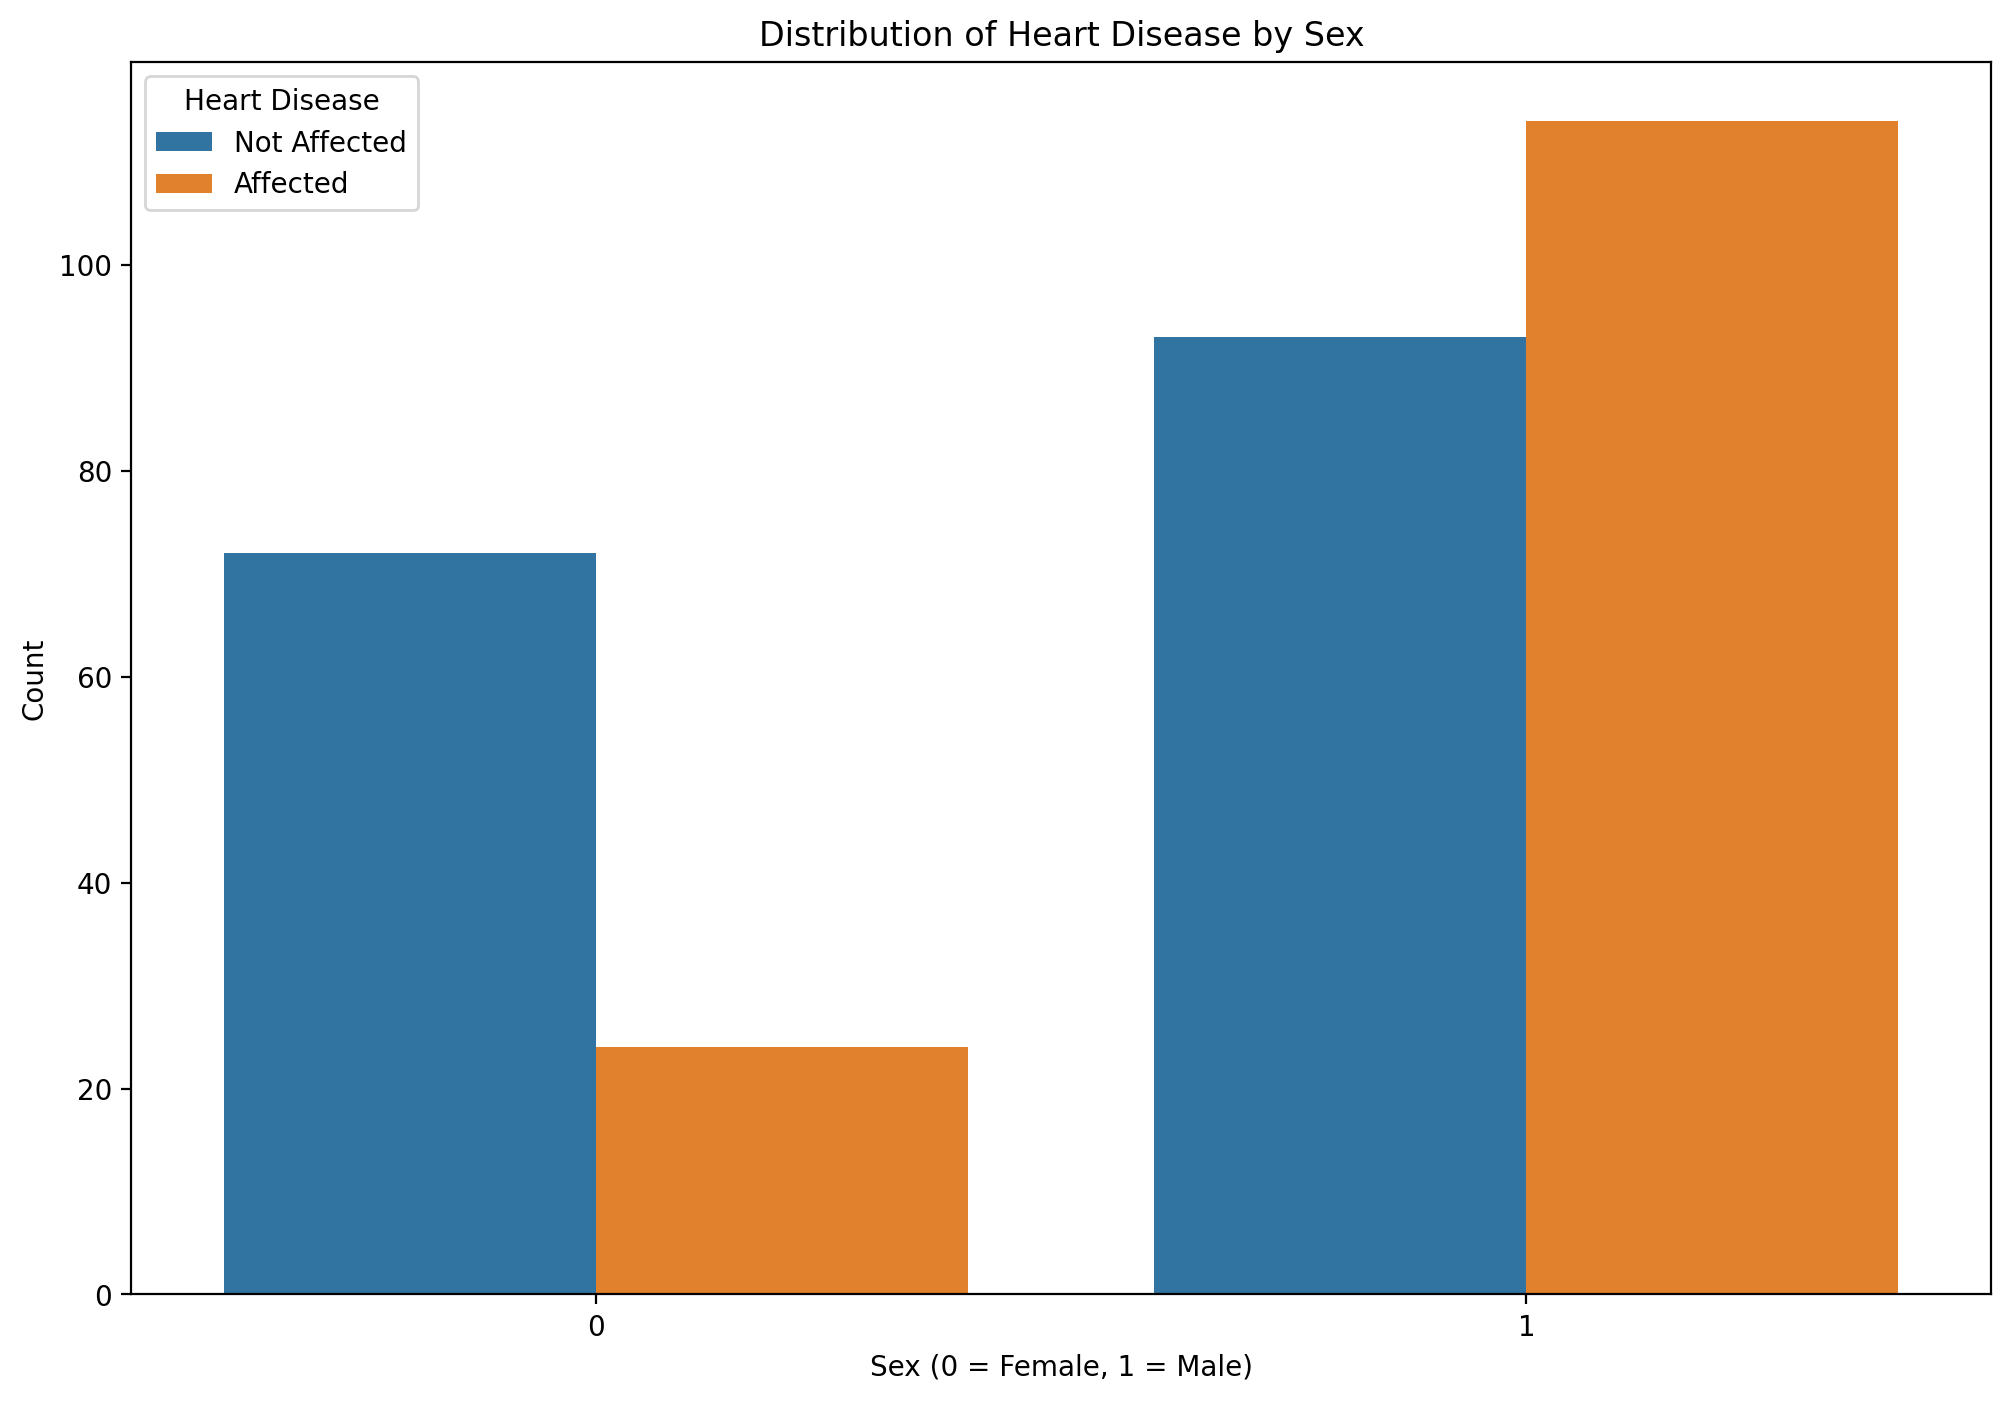

In [29]:
plt.figure(figsize=(12,8), dpi=200)

# Convert 'target' column to string type
df['target'] = df['target'].astype(str)

# Create a countplot with hue='target'
sns.countplot(x='sex', data=df, hue='target')

# Add a legend with labels
plt.legend(title='Heart Disease', labels=['Not Affected', 'Affected'])

# Set plot title and labels
plt.title('Distribution of Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')

# Save figs
plt.savefig('../assets/visualization/countplot-1.png', dpi=300)

# Show the plot
plt.show()

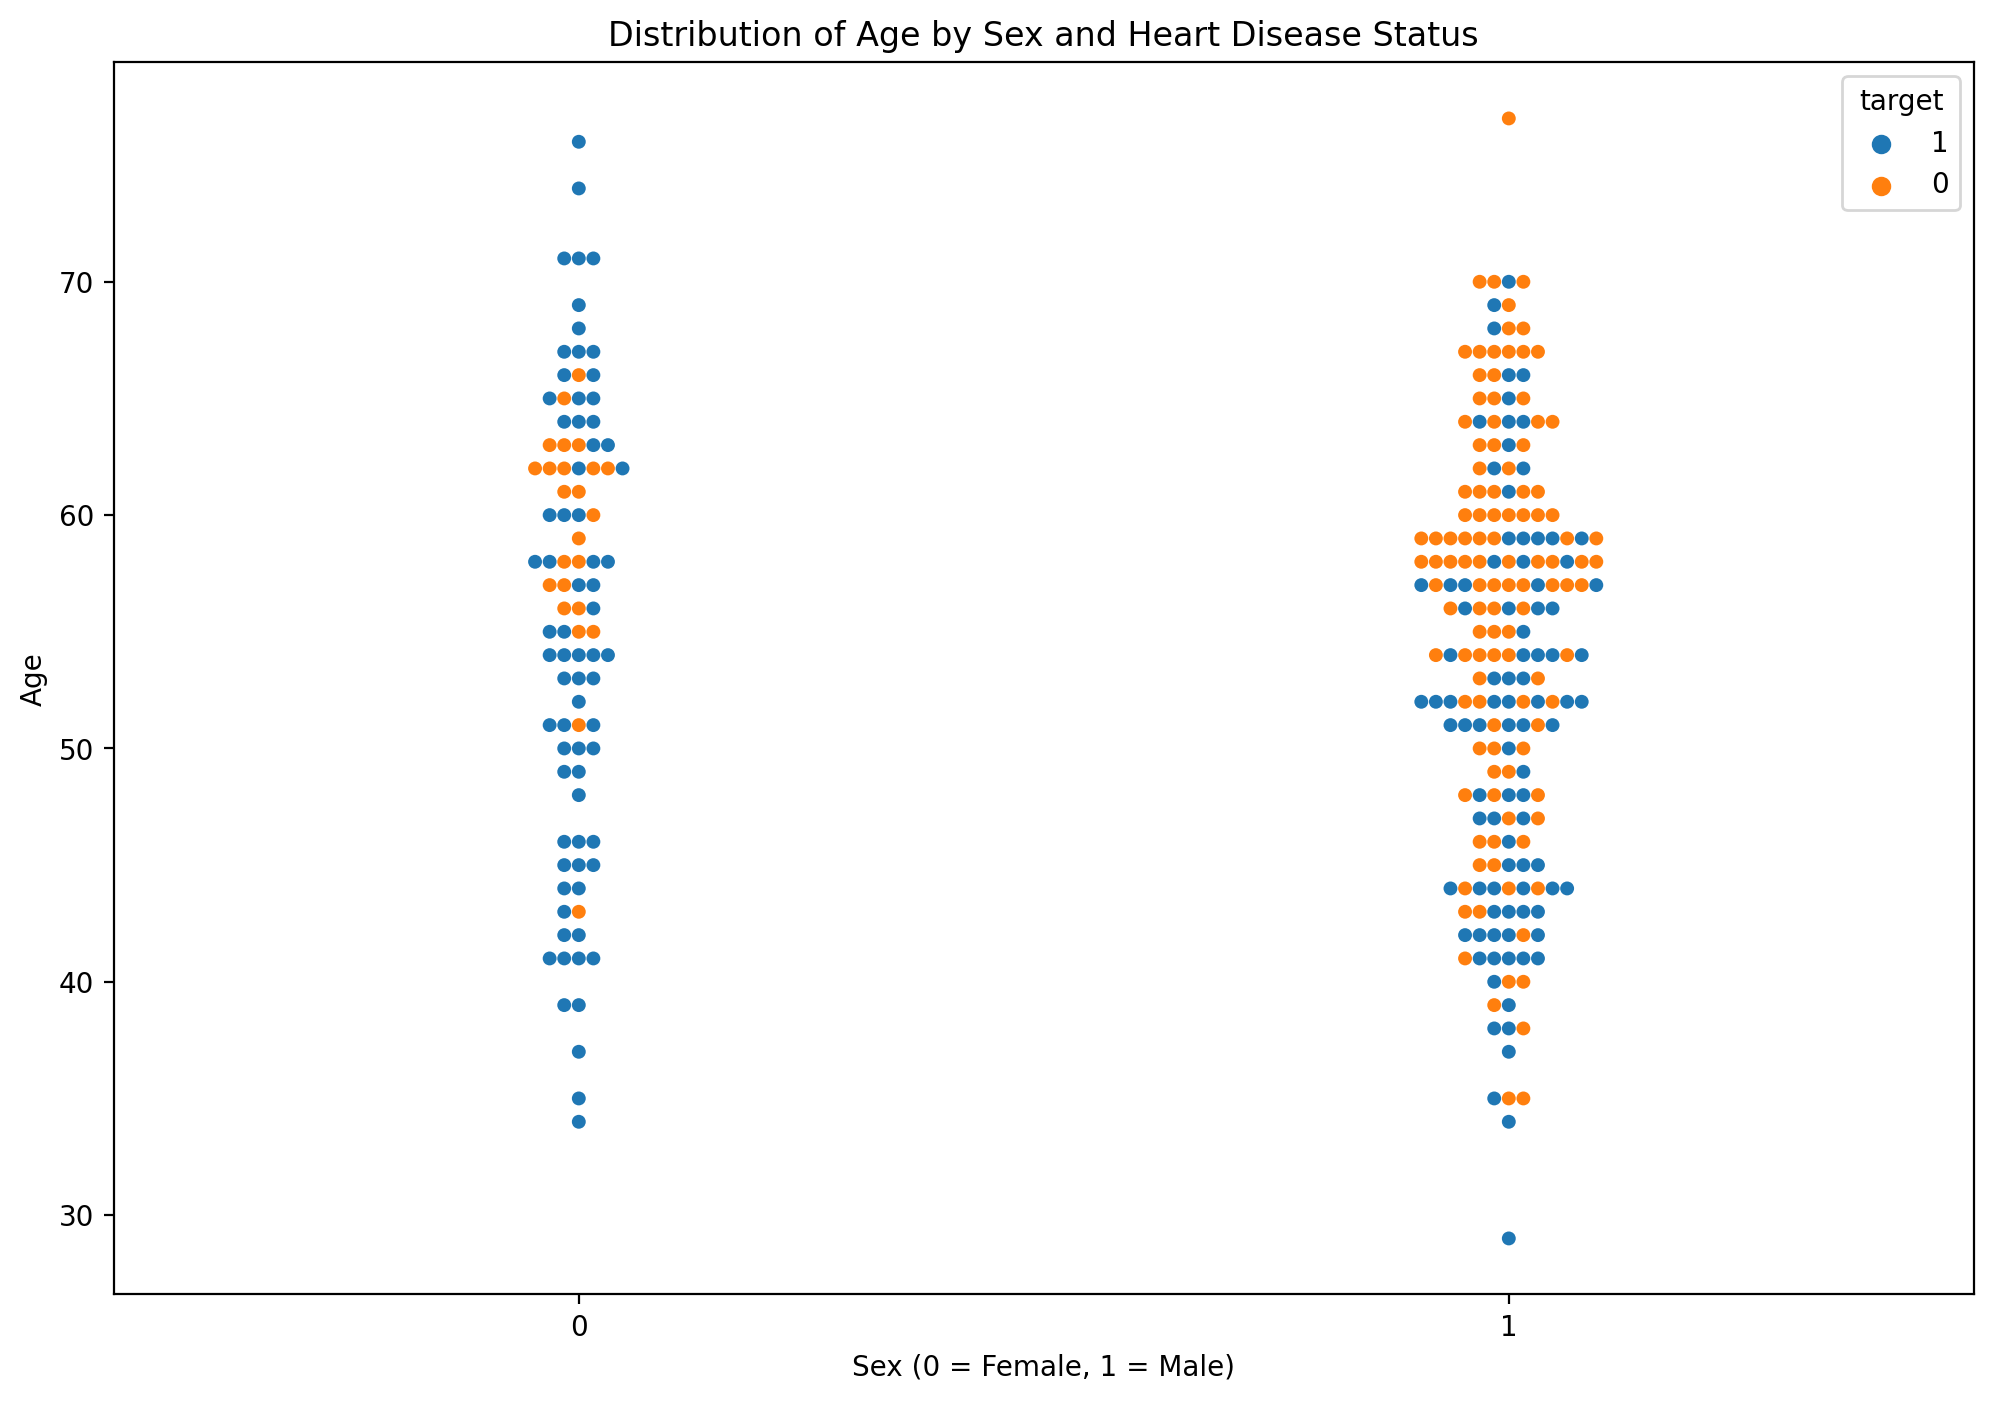

In [30]:
plt.figure(figsize=(12,8), dpi=200)

sns.swarmplot(x='sex', y='age', hue='target', data=df)
plt.title('Distribution of Age by Sex and Heart Disease Status')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Age')

# Save figs
plt.savefig('../assets/visualization/swarmplot.png', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2400x1600 with 0 Axes>

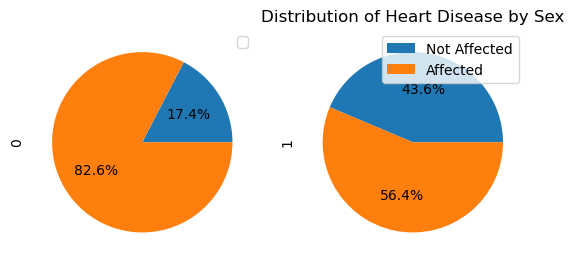

In [31]:
plt.figure(figsize=(12,8), dpi=200)

# Calculate counts
sex_target_counts = df.groupby(['sex', 'target']).size().unstack()

# Plot a pie chart
sex_target_counts.plot.pie(subplots=True, autopct='%1.1f%%', labels=None, legend=True)
plt.title('Distribution of Heart Disease by Sex')
plt.legend(['Not Affected', 'Affected'], loc='upper right')

# Save figs
plt.savefig('../assets/visualization/piechart.png', dpi=300)
plt.show()

## Model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop('target', axis=1)
y = df['target']

In [34]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaled_X_train = scaler.fit_transform(X_train)

In [39]:
scaled_X_test = scaler.transform(X_test)

### Model Building & Hyper Paramer Tunning

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [41]:
# CREATE A BASE MODEL
log_model = LogisticRegression(solver='saga',max_iter=5000,multi_class='ovr')

In [42]:
# PARAMETER GRID FOR GRIDSEARCHCV
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty':penalty, 'l1_ratio':l1_ratio, 'C':C}

In [43]:
grid_model = GridSearchCV(log_model, param_grid=param_grid)

In [44]:
grid_model.fit(scaled_X_train, y_train)

C:\Users\ruzny\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ruzny\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ruzny\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ruzny\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ruzny\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ruzny\anaconda3\Lib\site-packag

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

### Model Evaluation

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [47]:
y_pred = grid_model.predict(scaled_X_test)
y_pred

array(['0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1',
       '0', '1', '1', '0', '0', '1', '0', '0', '1'], dtype=object)

In [48]:
y_pred[0], y_test.iloc[0]

('0', '0')

In [49]:
# ACC SCORE
accuracy_score(y_test, y_pred)

0.8360655737704918

In [50]:
confusion_matrix(y_test, y_pred)

array([[23,  8],
       [ 2, 28]], dtype=int64)

### Visualizing The Model Evaluation

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

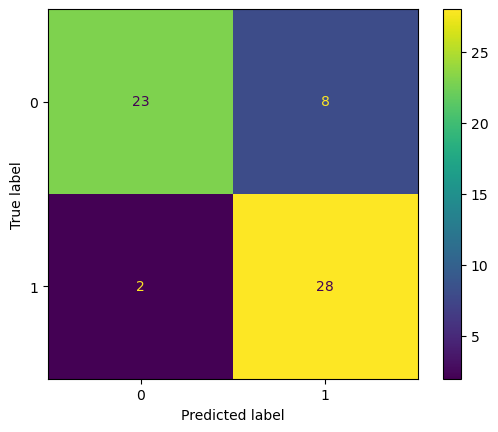

In [52]:
dsp = ConfusionMatrixDisplay.from_estimator(
    grid_model,
    scaled_X_test,
    y_test
)

print(dsp)

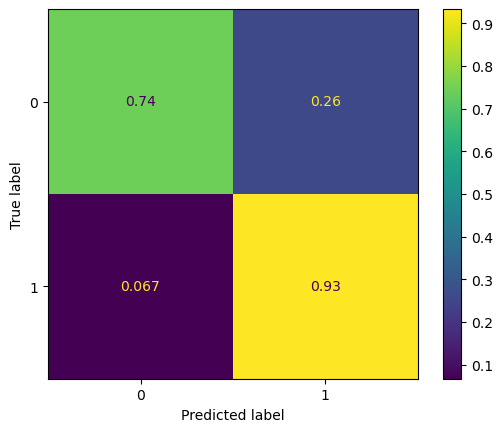

In [53]:
dsp = ConfusionMatrixDisplay.from_estimator(
    grid_model,
    scaled_X_test,
    y_test,
    normalize='true'
)

print(dsp)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [55]:
from sklearn.metrics import PrecisionRecallDisplay

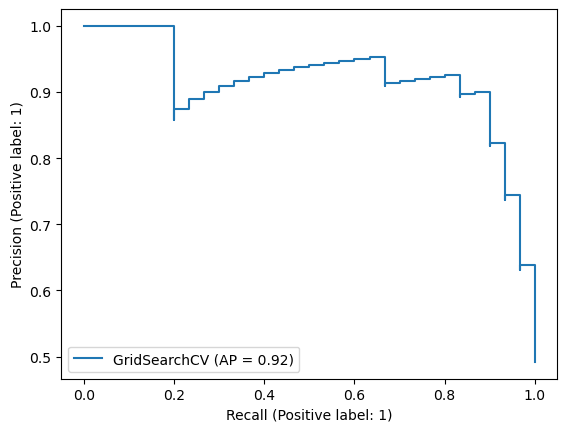

In [56]:
PrecisionRecallDisplay.from_estimator(grid_model, scaled_X_test, y_test)